In [5]:
import pandas as pd
df=pd.read_csv("job_offers.csv")
df.head()

,CGPA,Communication,Aptitude,ProgrammingSkill,JobOffered
0,2,1,1,1,1
1,1,1,1,1,1
2,0,0,0,1,0
3,0,1,0,0,0
4,2,1,1,0,1


In [3]:
y=df['JobOffered']
x=df.drop('JobOffered',axis=1)

In [7]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
dtree = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dtree.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

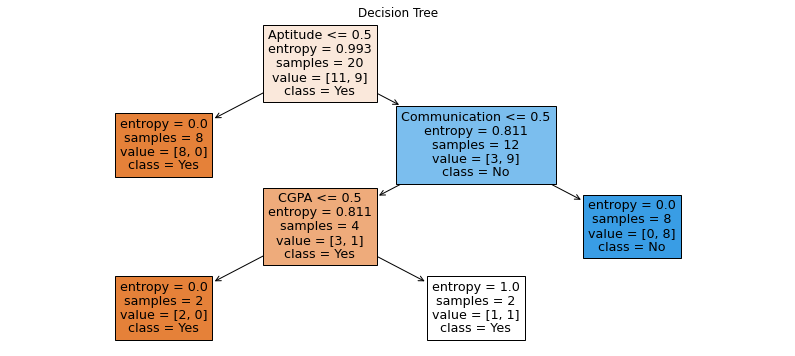

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plot_tree(dtree,filled=True,feature_names=['CGPA','Communication','Aptitude','ProgrammingSkill'],class_names=['Yes','No'])
plt.title("Decision Tree")
plt.show()

# Confusion Matrix

In [15]:
y_pred=dtree.predict(x)

In [19]:
from sklearn.metrics import confusion_matrix , classification_report
cm = confusion_matrix(y, y_pred)
cm

array([[11,  0],
       [ 1,  8]], dtype=int64)

In [24]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print(TN, FP, FN, TP)
accuracy = (TP + TN) / (TP + FP + FN + TN)
print("Accuracy: ",accuracy)

11 0 1 8
Accuracy:  0.95


In [25]:
print("error rate= ",1-accuracy)

error rate=  0.050000000000000044


In [26]:
sensitivity = TP / (TP + FN)
print("Sensitivity: ",sensitivity)

Sensitivity:  0.8888888888888888


In [27]:
specificity = TN / (TN + FP)
print("Specificity: ",specificity)

Specificity:  1.0


In [29]:
class_report = classification_report(y,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



# Task 1

In [44]:
import pandas as pd
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
y=df['Outcome']
x=df.drop('Outcome',axis=1)

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=2)

In [66]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
dtree = DecisionTreeClassifier(criterion = 'entropy',max_depth=26)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=26)

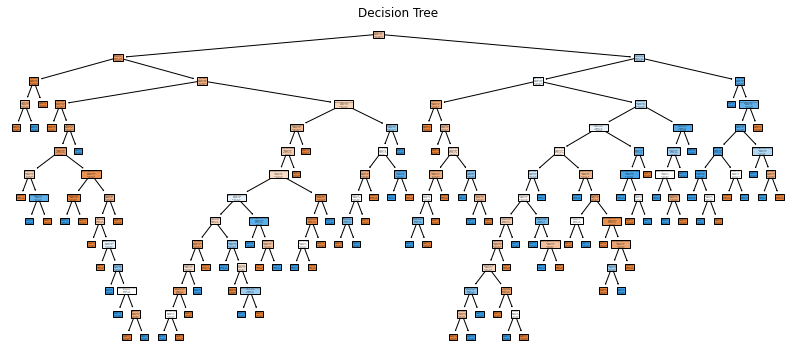

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plot_tree(dtree,filled=True,feature_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],class_names=['Yes','No'])
plt.title("Decision Tree")
plt.show()

In [69]:
y_pred=dtree.predict(x_test)

In [71]:
from sklearn.metrics import confusion_matrix , classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[120,  35],
       [ 42,  34]], dtype=int64)

In [72]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print(TN, FP, FN, TP)
accuracy = (TP + TN) / (TP + FP + FN + TN)
print("Accuracy: ",accuracy)

120 35 42 34
Accuracy:  0.6666666666666666


In [73]:
print("error rate= ",1-accuracy)

error rate=  0.33333333333333337


In [74]:
sensitivity = TP / (TP + FN)
print("Sensitivity: ",sensitivity)

Sensitivity:  0.4473684210526316


In [75]:
specificity = TN / (TN + FP)
print("Specificity: ",specificity)

Specificity:  0.7741935483870968


In [77]:
class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       155
           1       0.49      0.45      0.47        76

    accuracy                           0.67       231
   macro avg       0.62      0.61      0.61       231
weighted avg       0.66      0.67      0.66       231



In [79]:
print(dtree.get_depth())

13


# Task 2

In [81]:
import pandas as pd
df=pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [82]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [84]:
df = pd.get_dummies(data=df,drop_first=True)
df

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
0,23,25.355,0,0,0,0,0,0,0,1
1,47,13.093,1,1,0,0,0,1,0,0
2,47,10.114,1,1,0,0,0,1,0,0
3,28,7.798,0,0,1,0,0,0,1,0
4,61,18.043,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,0,1,0,0,0,1,0,0
196,16,12.006,1,1,0,0,0,1,0,0
197,52,9.894,1,0,1,0,0,0,1,0
198,23,14.020,1,0,1,1,0,0,1,0
